## Waveform Generation

This document generates the waveform as the *current input* for the BaSyTec Machine 

In [11]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for waveform plotting

# -----------------------------
# Parameters for the script
# -----------------------------

# 1. Discretizing time
fs = 1000  # Sampling frequency in Hz

duration = 2000 # Duration of the signal in seconds 
'''
common mistake is putting 200 here: 200 refers to the window length in the literature, whereas duration is the full charging curve
Nonetheless, runtime is long for anything longer than that, so 200 is good for visualization purposes, though do switch it back
'''
t = np.arange(0, duration, 1/fs)  # Time list

t = np.round(t, 3)  # Round time to 3 decimal places

cell_capacity_Ah = 5 # cell capacity in Ampere-hours determined from the C/10 charge-discharge cycle
I_CC = 0.5 * cell_capacity_Ah  # 0.5 C

# 2. Discretizing frequency

# frequencies = np.logspace(np.log10(0.01), np.log10(2), 30) # Frequencies from 0.01 Hz to 2 Hz logarithmically 
# Note: Table 3 of literature used equidisatnce frequencies for the impedance spectrum
N = 30 # number of frequencies (TO_BE_CUSTOMIZED)
frequencies = np.linspace(0.01, 2, N)  # Frequencies from 0.01 Hz to 2 Hz linearly spaced

I_amp = 0.2 * I_CC # Amplitude of each frequency component

# 3. Generating the CCSM waveform
I_signal = I_CC + (I_amp / N) * np.sum(
    [np.sin(2 * np.pi * f * t) for f in frequencies],
    axis=0
)

# accuracy of current I is 1mA, so we round it to 3 decimal places
I_signal = np.round(I_signal, 3) 

# 4. Generating the dataframe
df = pd.DataFrame({
    "time_s": t,
    "current_A": I_signal
})

csv_path = "CCSM_waveform.csv"
txt_path = "CCSM_waveform.txt"

df.to_csv("CCSM_waveform.csv", index=False, header=False)
print("Saved to CCSM_waveform.csv" )
print("the first 5 rows of data are shown:")
print(df.head(5))

import csv

with open(csv_path, 'r', newline='') as csv_file:
    reader = csv.reader(csv_file)  # Reads CSV as rows
    with open(txt_path, 'w', newline='') as txt_file:
        writer = csv.writer(txt_file, delimiter='\t')  # Tab-separated
        for row in reader:
            writer.writerow(row)



Saved to CCSM_waveform.csv
the first 5 rows of data are shown:
   time_s  current_A
0   0.000      2.500
1   0.001      2.503
2   0.002      2.506
3   0.003      2.509
4   0.004      2.513


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # for waveform plotting

# -----------------------------
# Parameters for the script
# -----------------------------

# 1. Discretizing time
fs = 1000  # Sampling frequency in Hz

duration = 2000 # Duration of the signal in seconds 
'''
common mistake is putting 200 here: 200 refers to the window length in the literature, whereas duration is the full charging curve
Nonetheless, runtime is long for anything longer than that, so 200 is good for visualization purposes, though do switch it back
'''
t = np.arange(0, duration, 1/fs)  # Time list

cell_capacity_Ah = 5 # cell capacity in Ampere-hours determined from the C/10 charge-discharge cycle
I_CC = 0.5 * cell_capacity_Ah  # 0.5 C

# 2. Discretizing frequency

# frequencies = np.logspace(np.log10(0.01), np.log10(2), 30) # Frequencies from 0.01 Hz to 2 Hz logarithmically 
# Note: Table 3 of literature used equidisatnce frequencies for the impedance spectrum
N = 30 # number of frequencies (TO_BE_CUSTOMIZED)
frequencies = np.linspace(0.01, 2, N)  # Frequencies from 0.01 Hz to 2 Hz linearly spaced

I_amp = 0.2 * I_CC # Amplitude of each frequency component

# 3. Generating the CCSM waveform
I_signal = I_CC + (I_amp / N) * np.sum(
    [np.sin(2 * np.pi * f * t) for f in frequencies],
    axis=0
)

# 4. Generating the dataframe
df = pd.DataFrame({
    "time_s": t,
    "current_A": I_signal
})

df.to_csv("CCSM_waveform.csv", index=False)
print("Saved simulated_CCSM_log_small.csv with", len(df), "rows")
print("the first 5 rows of data are shown:")
print(df.head(5))



Saved simulated_CCSM_log_small.csv with 2000000 rows
the first 5 rows of data are shown:
   time_s  current_A
0   0.000   1.750000
1   0.001   1.752210
2   0.002   1.754420
3   0.003   1.756630
4   0.004   1.758839


Text(0.5, 1.0, 'Individual Frequency Components')

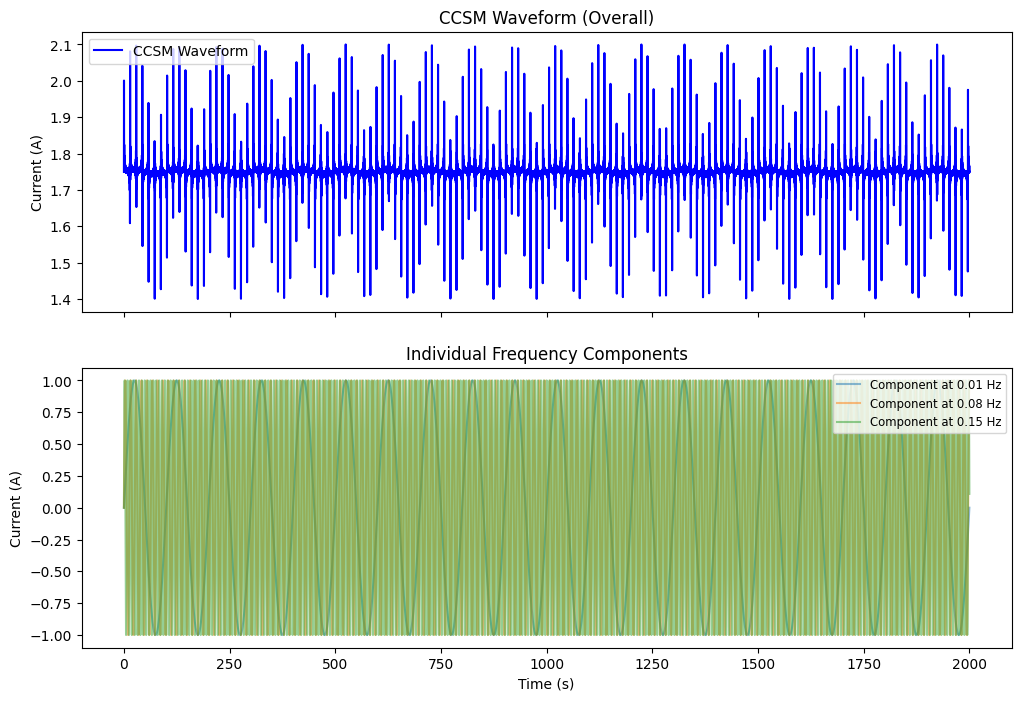

In [9]:
# 5. visualizing the waveform

# Create a figure with 2 rows and 1 column
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# 5.1 Plotting overall waveform in the first row
axs[0].plot(df["time_s"], df["current_A"], label="CCSM Waveform", color='blue')
axs[0].legend()
axs[0].set_ylabel("Current (A)")
axs[0].set_title("CCSM Waveform (Overall)")


# 5.2 Plotting individual waveform components in the second row (for visualization only the lowest 3 frequencies are shown)
for f in frequencies[0:3]:
    i_comp = np.sin(2 * np.pi * f * t)
    axs[1].plot(df["time_s"], i_comp, label=f"Component at {f:.2f} Hz", alpha=0.5)
    axs[1].legend(loc='upper right', fontsize='small')
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Current (A)")
axs[1].set_title("Individual Frequency Components")
# Optionally, show legend for a few components only to avoid clutter
# axs[1].legend(loc='upper right', ncol=2, fontsize